## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how = 'outer', on ='Mouse ID')
combined
                   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame. # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined[combined.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:

indexNames = combined[ combined['Mouse ID'] == "g989" ].index
combined.drop(indexNames , inplace=True)

In [4]:

combined[combined.duplicated(['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#regimen = combined.groupby(['Drug Regimen'])
#tumor_vol = regimen['Tumor Volume (mm3)'].sum()


In [6]:
mean = combined.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median =  combined.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = combined.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev = combined.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = combined.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [7]:
mean_c = (pd.DataFrame([mean])).transpose()
mean_df = mean_c.rename(columns = {"Tumor Volume (mm3)":"Mean"})
median_c = (pd.DataFrame([median])).transpose()
median_df = median_c.rename(columns = {"Tumor Volume (mm3)":"Median"})
variances_c = (pd.DataFrame([variances])).transpose()
variances_df = variances_c.rename(columns = {"Tumor Volume (mm3)":"Variance"})
stdev_c = (pd.DataFrame([stdev])).transpose()
stdev_df = stdev_c.rename(columns = {"Tumor Volume (mm3)":"STDEV"})
sem_c = (pd.DataFrame([sem])).transpose()
sem_df = sem_c.rename(columns = {"Tumor Volume (mm3)":"SEM"})

st1 = pd.merge(mean_df, median_df, on = "Drug Regimen")
st2 = pd.merge(st1, variances_df, on = "Drug Regimen")
st3 = pd.merge(st2, stdev_df, on = "Drug Regimen")
summary_table = pd.merge(st3, sem_df, on = "Drug Regimen")

summary_table

,Mean,Median,Variance,STDEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
drug_group = combined.groupby(['Drug Regimen'])
count = drug_group['Age_months'].count()
bar_final = pd.DataFrame([count]).transpose()
bar_final = bar_final.rename (columns = {"Age_months":"Data Points"})
bar_final

,Data Points
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


## Bar Plots

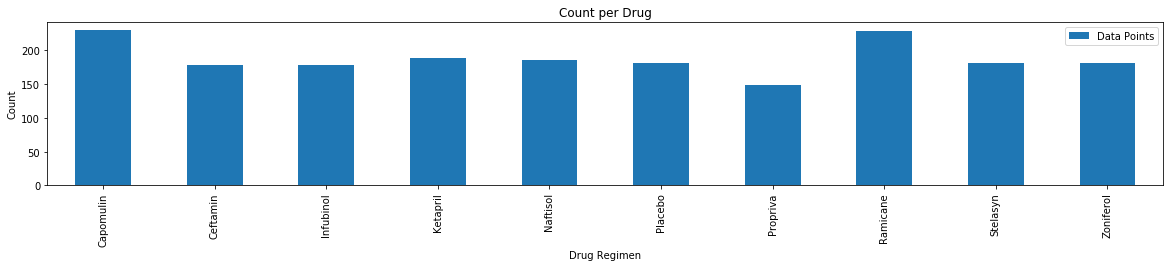

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_final.plot(kind="bar", figsize=(20,3))
plt.title("Count per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

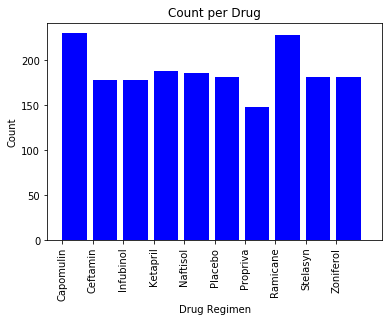

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
bar_final2 = bar_final.reset_index()


x_axis = np.arange(len(bar_final2['Drug Regimen']))
data = bar_final2['Data Points']
drug = bar_final2['Drug Regimen']
#drugs = len(bar_final['Drug Regimen'])

plt.bar(x_axis, data,color="b", align="edge")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug)

plt.title("Count per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.xlim(-.5, len(x_axis)+.5)

plt.xticks(rotation=90)



## Pie Plots

In [11]:
total = len(combined["Sex"])
gender = combined["Sex"].value_counts().reset_index()
gender = gender.rename(columns={"index":"Gender","Sex":"Count"})


In [12]:
percent_gender = gender["Count"]/total*100
percent_gender_df = pd.DataFrame([percent_gender]).transpose()
Gender = ['Male','Female']
percent_gender_df['Gender'] = Gender
percent_gender_df

,Count,Gender
0,50.957447,Male
1,49.042553,Female


Text(0.5, 1.0, 'Count')

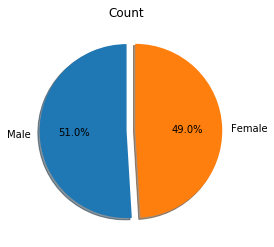

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = percent_gender_df['Gender']
count = percent_gender_df['Count']
explode = (0,.1)

plt.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("Count")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c46bd90>],
      dtype=object)

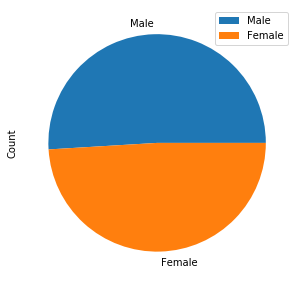

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#series = pd.Series()

#series = pd.Series(3 * np.random.rand(4),index=['a', 'b', 'c', 'd'], name='series')

percent_gender_df = percent_gender_df.set_index("Gender")
percent_gender_df

percent_gender_df.plot.pie(subplots=True, figsize=(5, 5), labels = ['Male','Female'])



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 



maximum = combined.groupby(["Mouse ID"]).max()
maximum = maximum.reset_index()

final = maximum[["Mouse ID","Timepoint"]].merge(combined, on=["Mouse ID","Timepoint"], how="left")

ceftamin = final.loc[final["Drug Regimen"]=="Ceftamin"]
ceftamin_vol = ceftamin["Tumor Volume (mm3)"]

ramicame = final.loc[final["Drug Regimen"]=="Ramicame"]
ramicame_vol = ramicame["Tumor Volume (mm3)"]

capomulin = final.loc[final["Drug Regimen"]=="Capomulin"]
capomulin_vol = capomulin["Tumor Volume (mm3)"]

naftisol = final.loc[final["Drug Regimen"]=="Naftisol"]
naftisol_vol = naftisol["Tumor Volume (mm3)"]


cef_quartiles = ceftamin_vol.quantile([.25,.5,.75])
cef_lowerq = quartiles[0.25]
cef_upperq = quartiles[0.75]
cef_iqr = upperq-lowerq


ram_quartiles = ramicame_vol.quantile([.25,.5,.75])
ram_lowerq = quartiles[0.25]
ram_upperq = quartiles[0.75]
ram_iqr = upperq-lowerq
capomulin_2 = combined.loc[combined["Drug Regimen"]=="Capomulin"]


#weight = capomulin_2.groupby(["Weight (g)"])
mean = capomulin.groupby('Weight (g)').mean()['Tumor Volume (mm3)']

mean_df = pd.DataFrame([mean]).transpose().reset_index()
mean_df

NameError: name 'quartiles' is not defined

In [ ]:
# Generate a box plot of the final tumor volume of each mouse
#across four regimens of interest
cap_quartiles = capomulin_vol.quantile([.25,.5,.75])
cap_lowerq = quartiles[0.25]
cap_upperq = quartiles[0.75]
cap_iqr = upperq-lowerq


naf_quartiles = naftisol_vol.quantile([.25,.5,.75])
naf_lowerq = quartiles[0.25]
naf_upperq = quartiles[0.75]
naf_iqr = upperq-lowerq

cef_quartiles

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse
#treated with Capomulin

line = combined.loc[combined["Mouse ID"]=="l509"]

plt.plot(line['Timepoint'], line ['Tumor Volume (mm3)'])

plt.xlabel("Tumor Volume")
plt.ylabel("Time Point")
plt.title ("Treatment with Capomulin Tumor Volume over Time")

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mean = capomulin.groupby('Weight (g)').mean()['Tumor Volume (mm3)']

mean_df = pd.DataFrame([mean]).transpose().reset_index()
mean_df

capomulin_2 = combined.loc[combined["Drug Regimen"]=="Capomulin"]


#weight = capomulin_2.groupby(["Weight (g)"])
mean = capomulin.groupby('Weight (g)').mean()['Tumor Volume (mm3)']

mean_df = pd.DataFrame([mean]).transpose().reset_index()
mean_df

In [ ]:

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = mean_df['Weight (g)']

# Create a random array of data that we will use for our y values
y_axis = mean_df['Tumor Volume (mm3)']


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight2 = mean_df['Weight (g)']
volume2 = mean_df['Tumor Volume (mm3)']

correlation = st.pearsonr(weight2, volume2)

print(f"The correlation is {round(correlation[0],2)}")


x_values = weight2
y_values = volume2
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


print(f"The linear regression model is " + line_eq)